# Challenge Description

In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

…ever wondered how Netflix, Amazon Prime, Showmax, Disney and the likes somehow know what to recommend to you? 

<img src="imgs/header.png" width="800" />

…it's not just a guess drawn out of the hat. There is an algorithm behind it.

With this context, EDSA challenged us to construct a `recommendation algorithm` based on `content` or `collaborative filtering`, capable of accurately predicting how a user will `rate` a movie they have not yet viewed based on their historical preferences.

**What value is achieved through building a functional recommender system?**

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.
<img src="imgs/recommendation-system.webp" width="600" />


# Dataset Description
### Data Overview

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes. 

### Source

The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB.

### Supplied Files

- genome_scores.csv - a score mapping the strength between movies and tag-related properties.
- genome_tags.csv - user assigned tags for genome-related scores
- imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
- links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
- sample_submission.csv - Sample of the submission format for the hackathon.
- tags.csv - User assigned for the movies within the dataset.
- test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
- train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Loading Comet & Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Conclusion</a>

 <a id="one"></a>
### 1. Connecting Comet
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used to save the notebook version in comet. |

###  Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import cufflinks as cf

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from matplotlib import offsetbox
%matplotlib inline

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

#Importing the models
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import ward, dendrogram
import scipy.cluster.hierarchy as sch

from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, preprocessing)

from time import time    # Import time to measure algorithm runtime

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries used during sorting procedures.
import operator # <-- Convienient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists
 
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Imported for our sanity
import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the files into DataFrames. |

---

In [2]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
imdb = pd.read_csv('imdb_data.csv')
imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [3]:
tags = pd.read_csv('tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [4]:
genome_tags = pd.read_csv('genome_tags.csv')
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [5]:
links = pd.read_csv('links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
genome_scores = pd.read_csv('genome_scores.csv')
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [10]:
train = pd.read_csv('train.csv')
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [11]:
test = pd.read_csv('test.csv')
test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


<a id="three"></a>
### 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### Using a For Loop to check the shape of each dataframe.

In [18]:
list_of_all_dataframes = [ movies, imdb, tags, links, genome_scores, genome_tags, train, test ]

for each in list_of_all_dataframes:
    print(each.shape)
# https://stackoverflow.com/questions/68158905/using-for-loop-to-print-shape-of-multiple-dataframes

(62423, 3)
(27278, 6)
(1093360, 4)
(62423, 3)
(15584448, 3)
(1128, 2)
(10000038, 4)
(5000019, 2)


From above, it is observed that:
- movies has ~63 500 rows, and 3 columns
- imdb has ~27 300 rows, and 6 columns
- tags has ~1.1M rows, and 4 columns
- links has ~62 300 rows, and 3 columns
- genome_scores has ~15.6M rows, and 3 columns
- genome_tags has ~1100 rows, and 2 columns
- train has ~10M rows, and 4 columns
- test has ~5M rows, and 2 columns

Let's look at a distribution of the ratings given by users. Here we see that viewers generally are on the kinder end of the rating spectrum, with a far higher proportion of positive reviews (> 3) being given over negative ones (< 3):

In [19]:
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=train, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")
print (f'Average rating in dataset: {np.mean(train["rating"])}')

AttributeError: module 'seaborn' has no attribute 'factorplot'

### Let's see the vote average

In [23]:
average_rating = round(train.rating.mean(),2)  # To 2 decimal places
average_rating

3.53

From the more than 10M ratings that we have, the average rating in 3.53.

### Joining the 'movies', 'imbd', and 'train' dataframes together where movieId in one dataframe is the same as the movieId in the other dataframe.

In [28]:
imdb_movies = pd.merge(movies,imdb, on="movieId")
df = imdb_movies.merge(train, on="movieId")
df.head()

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,158849,5.0,994716786
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,97203,5.0,942683155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,161871,3.0,833104576
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,45117,4.0,1442256969
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,27431,5.0,849667827


In [30]:
df.describe()

,movieId,runtime,userId,rating,timestamp
count,9.633031e+06,6.979973e+06,9.633031e+06,9.633031e+06,9.633031e+06
mean,1.628712e+04,1.160965e+02,8.124516e+04,3.534708e+00,1.204205e+09
std,2.939986e+04,2.409290e+01,4.680182e+04,1.060377e+00,2.231643e+08
min,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,1.136000e+03,1.000000e+02,4.054500e+04,3.000000e+00,1.004634e+09
50%,2.762000e+03,1.130000e+02,8.097400e+04,3.500000e+00,1.181530e+09
75%,7.099000e+03,1.280000e+02,1.216250e+05,4.000000e+00,1.437667e+09
max,1.312620e+05,8.770000e+02,1.625410e+05,5.000000e+00,1.574327e+09


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9633031 entries, 0 to 9633030
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   movieId        int64  
 1   title          object 
 2   genres         object 
 3   title_cast     object 
 4   director       object 
 5   runtime        float64
 6   budget         object 
 7   plot_keywords  object 
 8   userId         int64  
 9   rating         float64
 10  timestamp      int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 881.9+ MB


In [33]:
df.isnull().sum()

movieId                0
title                  0
genres                 0
title_cast       2604407
director         2602688
runtime          2653058
budget           3152276
plot_keywords    2610043
userId                 0
rating                 0
timestamp              0
dtype: int64

### Plot missing values in each of the columns

Text(0.5, 1.0, 'MISSING VALUES IN EACH COLUMN')

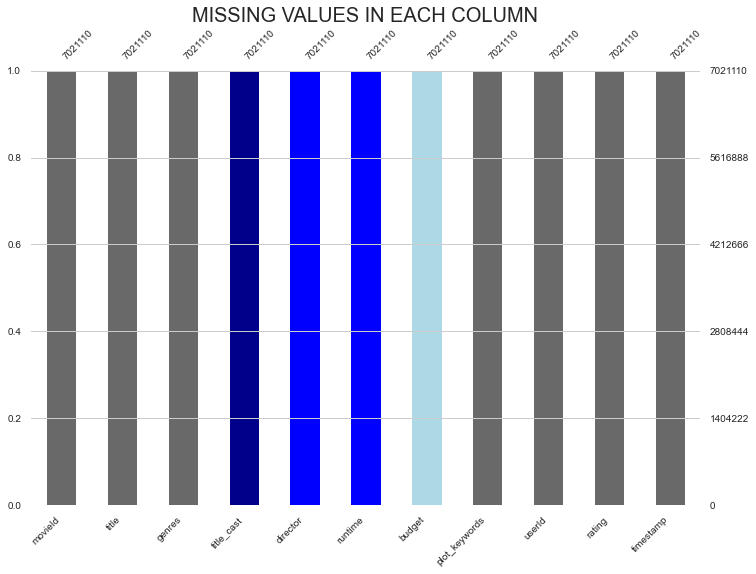

In [51]:
import missingno #Python library for the exploratory visualization of missing data #install using !pip install missingno
color= ['dimgrey','dimgrey','dimgrey','darkblue','blue','blue','lightblue','dimgrey','dimgrey','dimgrey','dimgrey','dimgrey']
missingno.bar(df,fontsize=10,color=color,figsize=(12,8))
plt.title('MISSING VALUES IN EACH COLUMN',fontsize=20)

- There are missing values in columns title_cast, director, plot_keywords, runtime and budget.
- We can't randomly fill the missing values in columns of director and title_cast, so we can drop them.

In [38]:
df = df.dropna( how='any',subset=['title_cast', 'director', 'plot_keywords', ])

In [39]:
df.isnull().sum()

movieId               0
title                 0
genres                0
title_cast            0
director              0
runtime           49046
budget           543399
plot_keywords         0
userId                0
rating                0
timestamp             0
dtype: int64

In [41]:
df.runtime.mode(), df.runtime.mean()

(0    101.0
 Name: runtime, dtype: float64,
 116.12350948011952)

In [43]:
df.budget.mode()

0    $30,000,000
Name: budget, dtype: object

In [48]:
df['runtime'] = df['runtime'].fillna(df['runtime'].mode()[0])
df['budget'] = df['budget'].fillna(df['budget'].mode()[0])

In [49]:
df.isnull().sum()

movieId          0
title            0
genres           0
title_cast       0
director         0
runtime          0
budget           0
plot_keywords    0
userId           0
rating           0
timestamp        0
dtype: int64

- All the missing values in the dataset have either been removed or filled.

In [50]:
df.duplicated().sum()

0

- The dataset has 0 duplicated values.

In [52]:
df['rating'].value_counts()

4.0    1805763
3.0    1417143
5.0     922566
3.5     917158
4.5     611282
2.0     485208
2.5     381174
1.0     236094
1.5     124549
0.5     120173
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

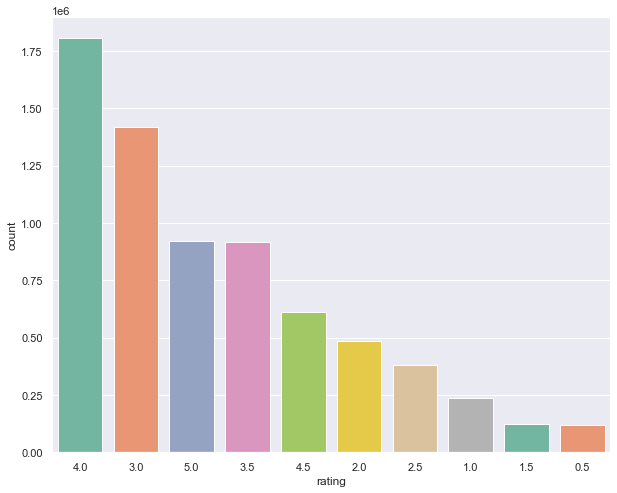

In [58]:
#MOVIES RATINGS
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
sns.countplot(x="rating", data= df, palette="Set2", order=df['rating'].value_counts().index[0:10])

In [ ]:
df['runtime']=df['runtime'].str.replace(' min','')
df['runtime']=df['runtime'].astype(str).astype(int)
df['runtime']

<AxesSubplot:xlabel='runtime', ylabel='Density'>

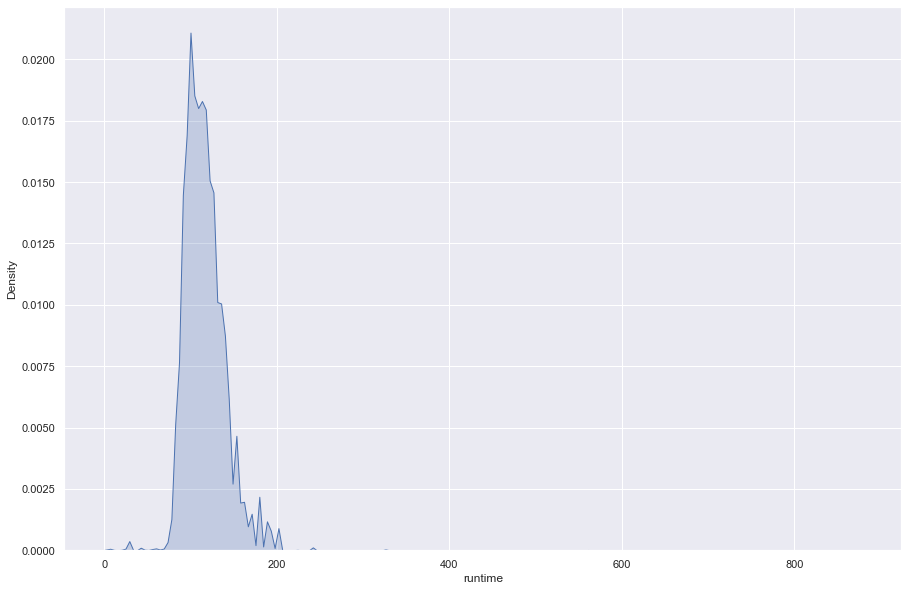

In [70]:
sns.set(style="darkgrid")
sns.kdeplot(data=df['runtime'], shade=True)

- It is observed that a good amount of movies have a run time of around 75-120 minutes.
- Very few movies have a runtime of less than 50 minutes, or more than 200 minutes

<a id="four"></a>
### 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

<a id="five"></a>
### 5. Modeling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modeling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more unsupervised models that are able to accurately predict how a user will  rate a movie they have not viewed based on historical preferences. |

---

<a id="six"></a>
### 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models and comment on what model is the best and why. |

---

 <a id="seven"></a>
### 1. Conclusion
<a href=#cont>Back to Table of Contents</a>